In [1]:
# https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

In [2]:
import math
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%store -r df1
%store -r df1_na_dropped
%store -r multi_class_data 

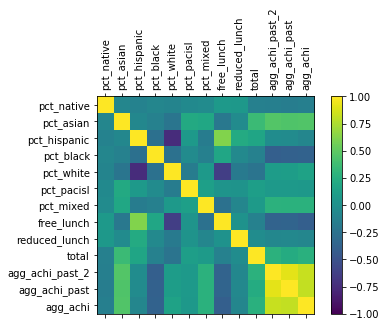

In [4]:
corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

Notes:
- Pct_white negatively correlated with pct_hispanic
- free_lunch positively correlated with pct_hispanic
- agg_achi somewhat positively correlated with pct_asian
- agg_achi loosely negatively correlated with pct_black and free_lunch
- free_lunch negatively correlated with pct_white
- high positive correlation between past and present agg_achi, but not that great results on classifer?

- Nothing particularly strongly correlated with achievement. Maybe try a different prediction?

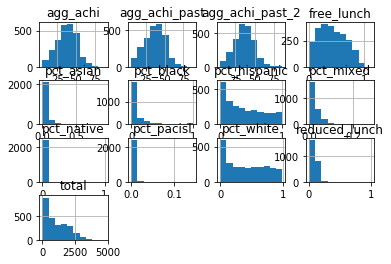

In [5]:
df1.hist()
plt.show()

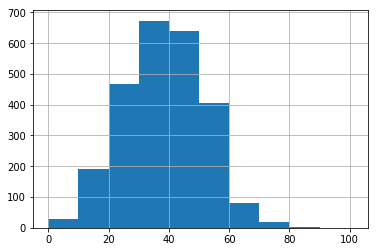

In [6]:
bins_10 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
df1.loc[ : , 'agg_achi' ].hist(bins=bins_10)
plt.show()

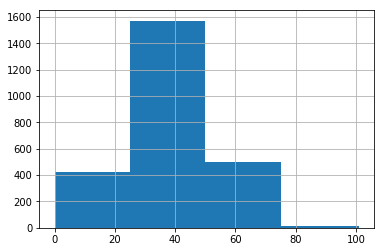

In [7]:
bins_25 = [0, 25, 50, 75, 101]
df1.loc[ : , 'agg_achi' ].hist(bins=bins_25)
plt.show()

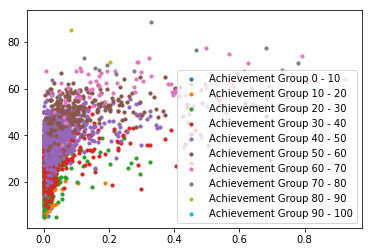

In [8]:
# find bucket, label accordingly
bin_size = 10
top_score = 100
interest_group = "pct_asian"

agg_achi = df1.loc[:, "agg_achi"]

for bin_num in range(top_score / bin_size):
    group = df1.loc[(agg_achi / bin_size) > bin_num].loc[(agg_achi / bin_size) < (bin_num + 1)]
    plt.scatter(group.loc[:, interest_group], 
                group.loc[:, "agg_achi_past"], 
                s=10, 
                label='Achievement Group %i - %i'% (bin_num * bin_size, (bin_num + 1) * bin_size))
plt.legend()
plt.show()

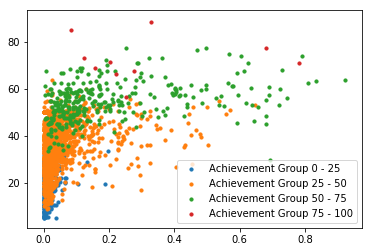

In [9]:
# find bucket, label accordingly
bin_size = 25
top_score = 100
feature_1 = "pct_asian"
feature_2 = "agg_achi_past"

agg_achi = df1.loc[:, "agg_achi"]

for bin_num in range(top_score / bin_size):
    group = df1.loc[(agg_achi / bin_size) > bin_num].loc[(agg_achi / bin_size) < (bin_num + 1)]
    plt.scatter(group.loc[:, feature_1], 
                group.loc[:, feature_2], 
                s=10, 
                label='Achievement Group %i - %i'% (bin_num * bin_size, (bin_num + 1) * bin_size))
plt.legend()
plt.show()

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

Notes:
- We should not be setting values to the median - the model learns that if it doesn't know, it should just set it to our median (prob around 50). This makes accuracy much lower.
- Again, I don't think Achievement group will be a very good evaluation metric as the data seems so scattered.
- pct_hispanic and free_lunch somewhat produced decision boundaries, but not great.
- pct_asian and agg_achi_past also somewhat produced decision boundaries
- Everything else idk

pct_native
pct_asian
pct_hispanic
pct_black
pct_white
pct_pacisl
pct_mixed
free_lunch
reduced_lunch
total
agg_achi_past_2
agg_achi_past
agg_achi
pct_native


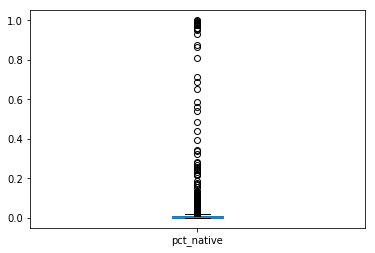

pct_asian


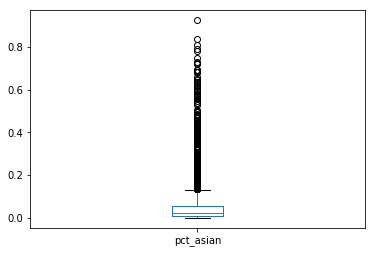

pct_hispanic


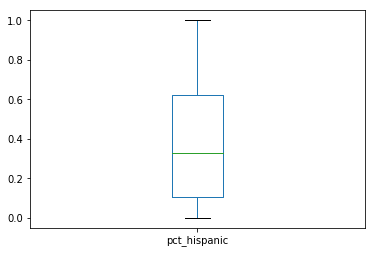

pct_black


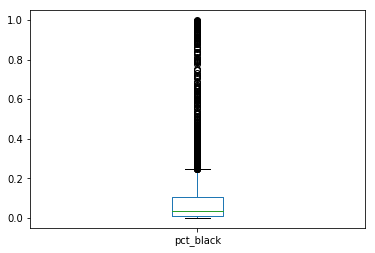

pct_white


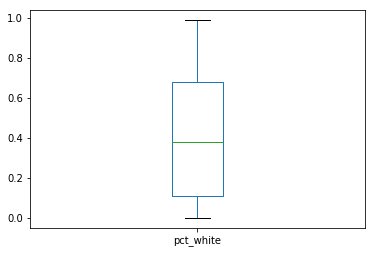

pct_pacisl


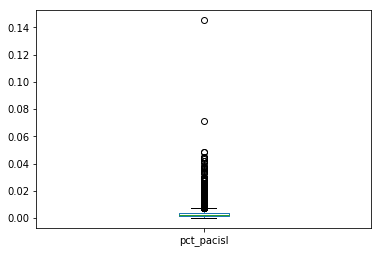

pct_mixed


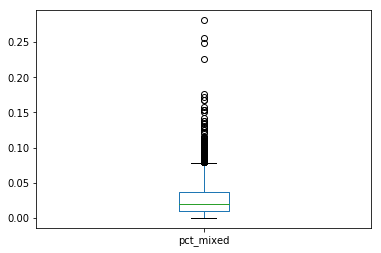

free_lunch


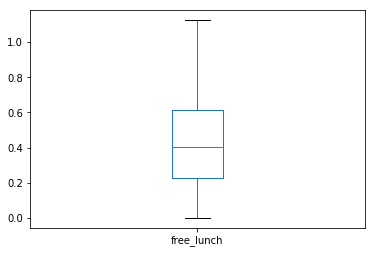

reduced_lunch


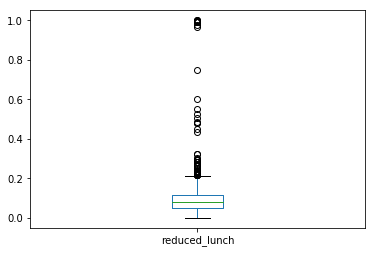

total


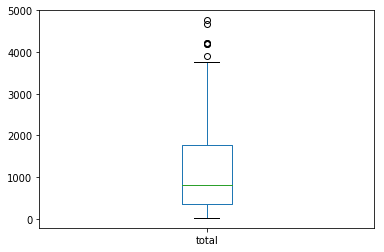

agg_achi_past_2


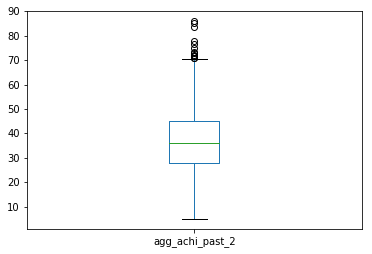

agg_achi_past


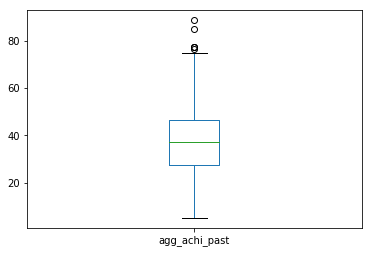

agg_achi


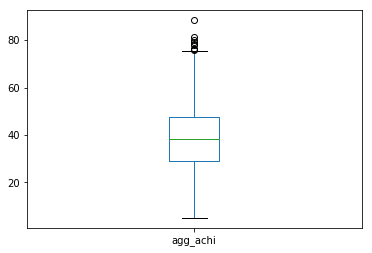

In [10]:
# Trying to figure out how to make formatting nicer

# fig = plt.figure(1)
# n_subplots=0

# for pos_subplot, column in enumerate(df1):
#     if df1[column]:
#         n_subplots += 1
#         ax = fig.add_subplot(n_subplots, 3, pos_subplot + 1)
#         df1[column].plot(kind='box', subplots=True, sharex=False, sharey=False)
# plt.show()

for column in df1:
    print column

for column in df1:
    print column
    df1[column].plot(kind='box', subplots=True, sharex=False, sharey=False)
    plt.show()

Notes:
- Notice that the box and whiskers for agg\_achi and agg\_achi\_past(\_2) are pretty similar, but when we did the logistic regression, the prediction power wasn't that high because school performance varied a lot from year to year.
- Want to figure out the change in performance from one year to the next for individual schools

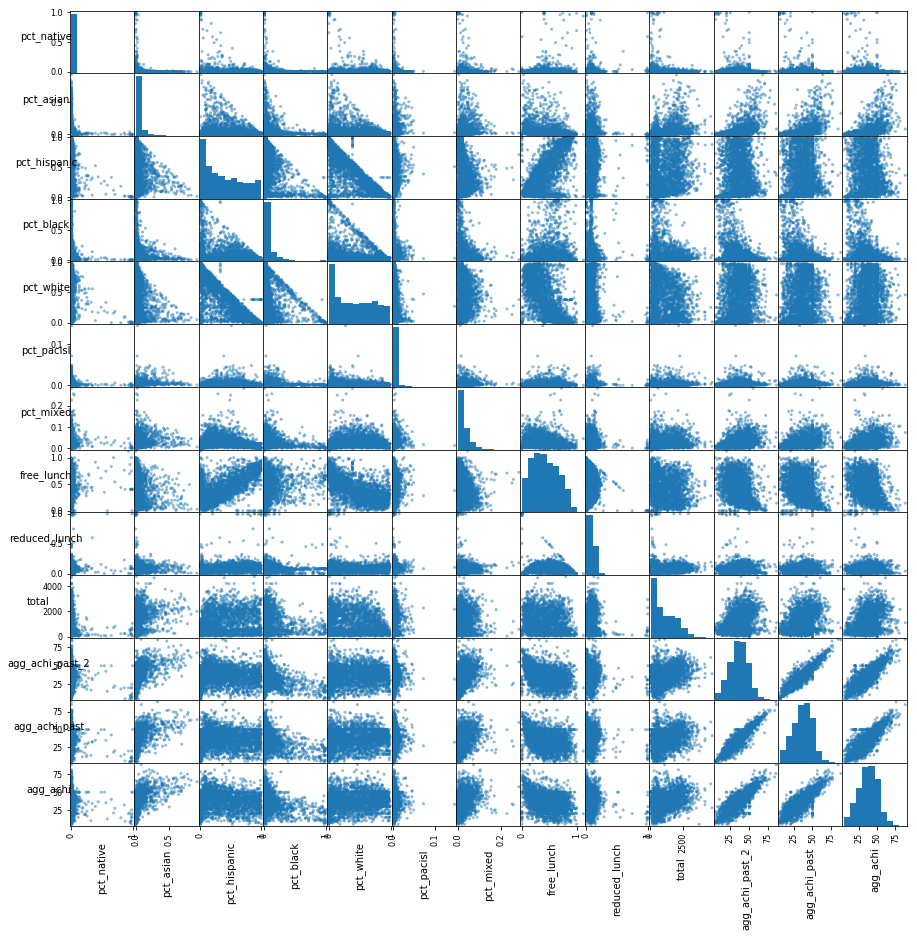

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix = scatter_matrix(df1, figsize= (15, 15))

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

plt.show()

Notes:
- Why do some of the plots (pct_white, pct_hispanic) look cut off at the diagonal? Maybe because percentage is capped?
- Note that pct_white agg_achi is pretty flat. Probably because lots of white people across the US, so performance will reflect the overall performance across the US
- Want to try regression again with pct_asian, pct_hispanic, pct_black, and free_lunch, then with just agg_achi_past. 
- Also want to try regression with NaN points removed.

# With NaN Removed

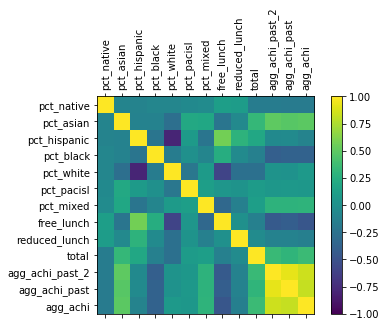

In [12]:
corr = df1_na_dropped.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

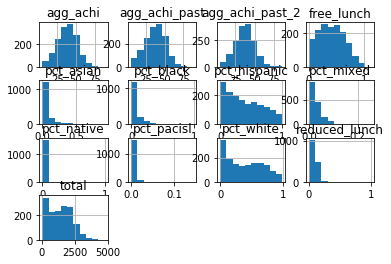

In [13]:
df1_na_dropped.hist()
plt.show()

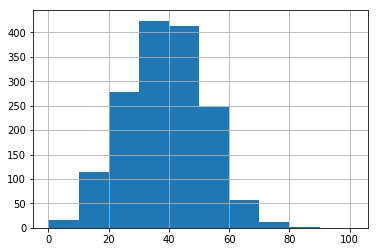

In [14]:
bins_10 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
df1_na_dropped.loc[ : , 'agg_achi' ].hist(bins=bins_10)
plt.show()

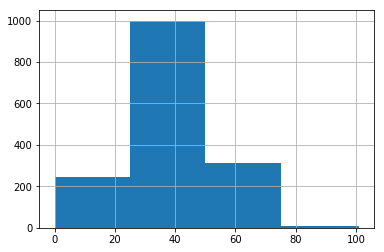

In [15]:
bins_25 = [0, 25, 50, 75, 101]
df1_na_dropped.loc[ : , 'agg_achi' ].hist(bins=bins_25)
plt.show()

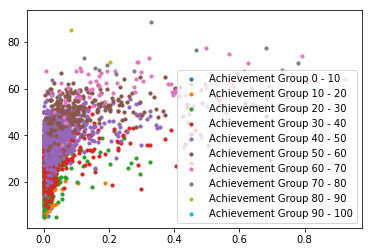

In [16]:
# find bucket, label accordingly
bin_size = 10
top_score = 100
interest_group = "pct_asian"

agg_achi = df1_na_dropped.loc[:, "agg_achi"]

for bin_num in range(top_score / bin_size):
    group = df1_na_dropped.loc[(agg_achi / bin_size) > bin_num].loc[(agg_achi / bin_size) < (bin_num + 1)]
    plt.scatter(group.loc[:, interest_group], 
                group.loc[:, "agg_achi_past"], 
                s=10, 
                label='Achievement Group %i - %i'% (bin_num * bin_size, (bin_num + 1) * bin_size))
plt.legend()
plt.show()

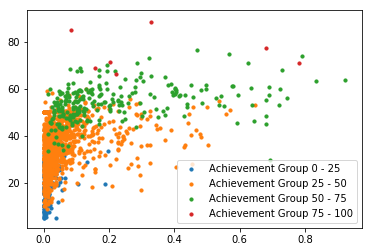

In [18]:
# find bucket, label accordingly
bin_size = 25
top_score = 100
feature_1 = "pct_asian"
feature_2 = "agg_achi_past"

agg_achi = df1_na_dropped.loc[:, "agg_achi"]

for bin_num in range(top_score / bin_size):
    group = df1_na_dropped.loc[(agg_achi / bin_size) > bin_num].loc[(agg_achi / bin_size) < (bin_num + 1)]
    plt.scatter(group.loc[:, feature_1], 
                group.loc[:, feature_2], 
                s=10, 
                label='Achievement Group %i - %i'% (bin_num * bin_size, (bin_num + 1) * bin_size))
plt.legend()
plt.show()

# Linear/Logistic regression, again

In [26]:
df1_na_dropped.head()

,pct_native,pct_asian,pct_hispanic,pct_black,pct_white,pct_pacisl,pct_mixed,free_lunch,reduced_lunch,total,agg_achi_past_2,agg_achi_past,agg_achi,agg_ach_bin
0,0.000000,0.041775,0.127937,0.036554,0.775457,0.005222,0.013055,0.052219,0.039164,383.0,45.000000,40.250,50.000,[50-60)
1,0.007160,0.004773,0.813842,0.076372,0.095465,0.000000,0.002387,0.632458,0.062053,419.0,44.166667,40.000,47.500,[40-50)
2,0.000000,0.002809,0.016854,0.643258,0.308989,0.000000,0.028090,0.792135,0.087079,356.0,21.000000,15.000,25.500,[20-30)
3,0.005691,0.053802,0.741852,0.028971,0.144853,0.005173,0.019659,0.443870,0.115882,1933.0,45.125000,45.000,46.400,[40-50)
8,0.001789,0.214669,0.540250,0.157424,0.025045,0.048301,0.012522,0.531306,0.227191,559.0,44.125000,42.875,36.875,[30-40)


In [48]:
# Linear regression
subset = df1_na_dropped[['pct_asian', 'pct_hispanic', 'pct_black', 'free_lunch', 'agg_achi_past', 'agg_achi']]

features = subset[['pct_asian', 'pct_hispanic', 'pct_black', 'free_lunch','agg_achi_past']].values
labels = subset[['agg_achi']].values

from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

model = lr.fit(train, train_labels)

score = model.score(test, test_labels)
print(score)


0.7013129637730645


In [53]:
# Logistic regression
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
names = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100]']

subset = df1_na_dropped[['pct_asian', 'pct_hispanic', 'pct_black', 'free_lunch', 'agg_achi_past', 'agg_achi']]
subset['agg_achi_bin'] = pd.cut(subset.agg_achi, bins, labels = names, right = False)

mc_features = subset[['pct_asian', 'pct_hispanic', 'pct_black', 'free_lunch','agg_achi_past']].values
mc_labels = subset[['agg_achi_bin']].values

mc_train, mc_test, mc_train_labels, mc_test_labels = train_test_split(mc_features, mc_labels, test_size = 0.2)

from sklearn.linear_model import LogisticRegression
mclr = LogisticRegression(solver = 'lbfgs', max_iter=1000000, multi_class='multinomial')

mc_model = mclr.fit(mc_train, mc_train_labels)

import sklearn.metrics
mc_score = mc_model.score(mc_test, mc_test_labels)
print(mc_score)


/Users/samanthakim/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.5207667731629393


### Logistic Regression Analysis

In [55]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

for multi_class in ('multinomial', 'ovr'):


    # print the training scores

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = mclr.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(mclr.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = mclr.coef_
    intercept = mclr.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(mclr.classes_, colors):
        plot_hyperplane(i, color)

plot_classifier(X_train, y_train==1, lr_class_1)

NameError: name 'X' is not defined